### 텐서 연결 & 결합

In [4]:
# 모듈 로딩
import torch

In [10]:
# 텐서 데이터 생성
torch.manual_seed(12)

# torch.rand(텐서 사이즈) => 임의의 0.<=x<1. 실수 (= 0보다 크거나 같고 1보다 작은 실수 값)
x = torch.rand(2,10) # 2 X 10

# torch.randint(숫자1, 숫자2, (텐서 사이즈)) =>임의의 정수 : low <= y < high
y = torch.randint(0, 2, (10,)) # 1X10 벡터
z = torch.randint(0, 2, (2, 10)) # 2X10 매트릭스

In [11]:
print(f'x = {x}')
print(f'y = {y}')
print(f'z = {z}')


x = tensor([[0.4657, 0.2328, 0.4527, 0.5871, 0.4086, 0.1272, 0.6373, 0.2421, 0.7312,
         0.7224],
        [0.1992, 0.6948, 0.5830, 0.6318, 0.5559, 0.1262, 0.9790, 0.8443, 0.1256,
         0.4456]])
y = tensor([0, 1, 0, 0, 1, 0, 1, 1, 0, 0])
z = tensor([[1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 0, 0, 0, 0]])


In [13]:
print(f'x=> {x.shape}, {x.ndim}D') 
print(f'y=> {y.shape}, {y.ndim}D') 
print(f'z=> {z.shape}, {z.ndim}D') 

x=> torch.Size([2, 10]), 2D
y=> torch.Size([10]), 1D
z=> torch.Size([2, 10]), 2D


In [18]:
# tensor 연결 cat([텐서1, 텐서2 ...])
xz = torch.cat([x, z], dim=0)
print(f'[xy]\n{xz}\n{xz.shape}, {xz.ndim}D')

[xy]
tensor([[0.4657, 0.2328, 0.4527, 0.5871, 0.4086, 0.1272, 0.6373, 0.2421, 0.7312,
         0.7224],
        [0.1992, 0.6948, 0.5830, 0.6318, 0.5559, 0.1262, 0.9790, 0.8443, 0.1256,
         0.4456],
        [1.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000]])
torch.Size([4, 10]), 2D


In [20]:
# 
xz.max(dim=0)

# dim=0 첫번째 차원에 대해서 최댓값을 구한 것
# 출력 값 =>
#           values = 각 열에 대한 최댓값을 모두 출력
#           indices = values 값의 인덱스 출력.

torch.return_types.max(
values=tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9790, 0.8443, 0.7312,
        0.7224]),
indices=tensor([2, 2, 3, 2, 2, 3, 1, 1, 0, 0]))

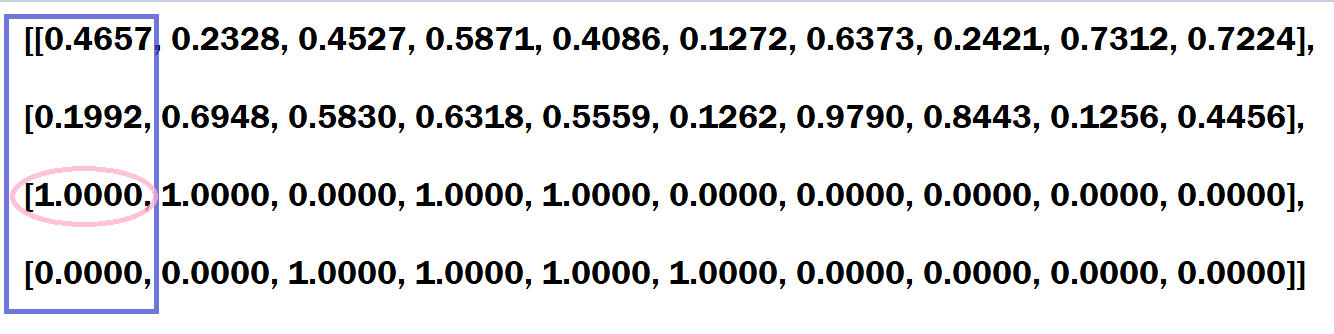

In [23]:
# ▲ 열 단위의 최댓값 및 최댓값의 인덱스
maxValue = xz.max(dim=0)[0] # 각 열에 대한 최댓값
maxIndex = xz.max(dim=0)[1] # 최댓값의 인덱스
print(f'maxValue => {maxValue}\nmaxIndex => {maxIndex}')

maxValue => tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9790, 0.8443, 0.7312,
        0.7224])
maxIndex => tensor([2, 2, 3, 2, 2, 3, 1, 1, 0, 0])


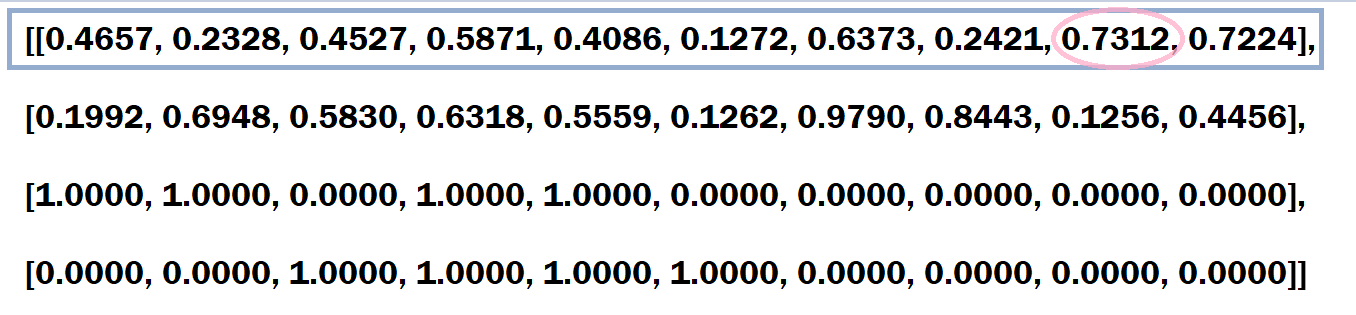

In [26]:
# ▲ 행 단위의 최댓값 및 최댓값의 인덱스
maxValue = xz.max(dim=1)[0] 
maxIndex = xz.max(dim=1)[1]
print(f'maxValue => {maxValue}\nmaxIndex => {maxIndex}')

# 안에 들어 있는 거 일수록 차원이 높은 듯..!

maxValue => tensor([0.7312, 0.9790, 1.0000, 1.0000])
maxIndex => tensor([8, 6, 0, 2])


In [27]:
import pandas as pd
data = pd.DataFrame({'A':[10, 11], 'B':[20,22], 'C':[30,33]})
data

,A,B,C
0,10,20,30
1,11,22,33


In [32]:
data.max(), data.max(axis=1) 
# axis=1 로 하면 해당 행에서 가장 큰 값을 찾아줌. (default는 axis = 0 (열))
# 집계함수는 다 이모냥으로 돌아간다.

(A    11
 B    22
 C    33
 dtype: int64,
 0    30
 1    33
 dtype: int64)